<a href="https://colab.research.google.com/github/naniprasad5678/DataMining/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
#import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [25]:
np.random.seed(42)
data=np.random.normal(0,1,100)
outliers=np.random.uniform(5,10,5)
data_with_outliers = np.concatenate([data, outliers])
df=pd.DataFrame(data_with_outliers,columns=['data'])

In [26]:
# Cell 3: Step 1 - Detect Outliers using IQR meewthod
Q1 = df['data'].quantile(0.25)
Q3 = df['data'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers based on IQR
outliers_iqr = df[(df['data'] < lower_bound) | (df['data'] > upper_bound)]


In [27]:
# Cell 4: Step 2 - Detect Outliers using Z-Score method
z_scores = stats.zscore(df['data'])
outliers_zscore = df[np.abs(z_scores) > 3]


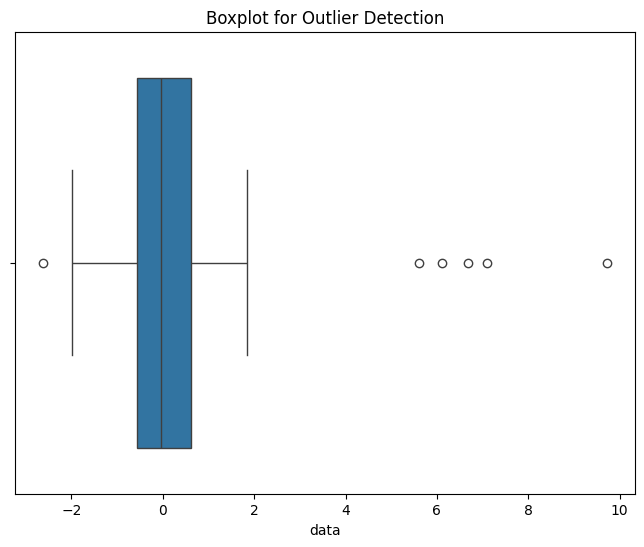

In [28]:
# Cell 5: Step 3 - Visualize outliers using a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['data'])
plt.title("Boxplot for Outlier Detection")
plt.show()


In [29]:
# Cell 6: Step 4 - Handle Outliers

# Capping: Set outliers to the upper and lower bounds
df_capped = df.copy()
df_capped['data'] = np.clip(df_capped['data'], lower_bound, upper_bound)

# Removal: Drop rows with outliers
df_removed = df.copy()
df_removed = df_removed[(df_removed['data'] >= lower_bound) & (df_removed['data'] <= upper_bound)]

# Imputation: Replace outliers with the median
df_imputed = df.copy()
median_value = df['data'].median()
df_imputed['data'] = np.where((df_imputed['data'] < lower_bound) | (df_imputed['data'] > upper_bound), median_value, df_imputed['data'])


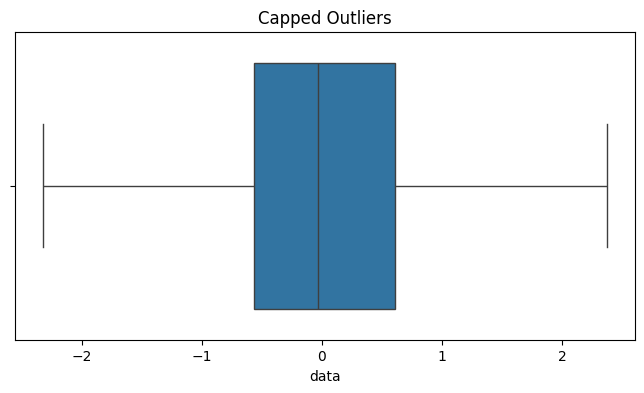

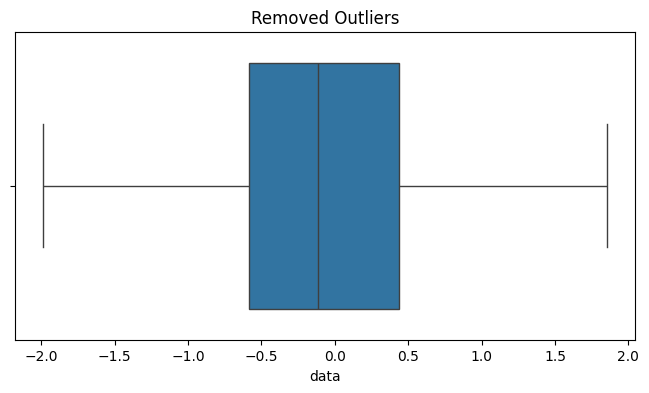

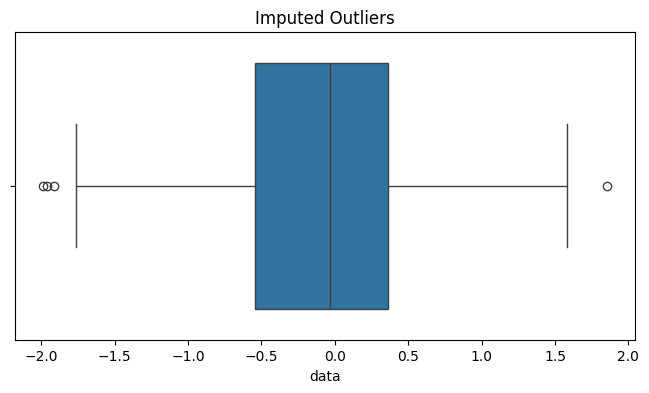

In [30]:
# Cell 7: Step 5 - Visualize handled data

# Capped data
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_capped['data'])
plt.title("Capped Outliers")
plt.show()

# Removed data
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_removed['data'])
plt.title("Removed Outliers")
plt.show()

# Imputed data
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_imputed['data'])
plt.title("Imputed Outliers")
plt.show()


In [31]:
# Cell 8: Print outliers detected
print(f"Outliers detected using IQR:\n{outliers_iqr}")
print(f"Outliers detected using Z-Score:\n{outliers_zscore}")


Outliers detected using IQR:
         data
74  -2.619745
100  7.087055
101  6.110539
102  5.599327
103  6.688076
104  9.714549
Outliers detected using Z-Score:
         data
100  7.087055
101  6.110539
102  5.599327
103  6.688076
104  9.714549
